# Introdução à Ciência de Dados - Trabalho Módulo 2

## Exploração dos dados

In [1]:
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
import requests
import os
from tqdm import tqdm
from multiprocessing import Pool
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cars_dataset.csv')
df.head(10)

,Modelo,Marca,Tipo de veículo,Ano,Quilometragem,Potência do motor,Combustível,Câmbio,Direção,Cor,Portas,Final de placa,CEP,Município,Bairro,price,motor,url
0,FIAT TORO FREEDOM 1.8 16V FLEX AUT.,FIAT,Pick-up,2017,86200.0,1.8,Flex,Automático,Hidráulica,Preto,4.0,5.0,76964008.0,Cacoal,Princesa Isabel,82500.0,1.8,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
1,VW - VOLKSWAGEN UP! TAKE 1.0 TOTAL FLEX 12V 5P,VW - VOLKSWAGEN,Hatch,2015,100000.0,1.0,Flex,Manual,Hidráulica,Branco,4.0,7.0,76890000.0,Jaru,NaN,32500.0,1.0,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
2,GM - CHEVROLET PRISMA SED. LT 1.4 8V FLEXPOWER 4P,GM - CHEVROLET,Sedã,2017,64000.0,1.4,Flex,Manual,Elétrica,Preto,4.0,1.0,76821468.0,Porto Velho,Rio Madeira,52900.0,1.4,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
3,FIAT SIENA ELX 1.0 MPI FIRE/FIRE FLEX 8V 4P,FIAT,Passeio,2007,125869.0,1.0,Flex,Manual,Mecânica,Branco,4.0,4.0,76812476.0,Porto Velho,Três Marias,14000.0,1.0,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
4,FIAT IDEA ADV.EXT./ADV.EXT. LOC. 1.8 FLEX 5P,FIAT,Hatch,2013,40000.0,1.8,Flex,Automático,Hidráulica,Verde,4.0,7.0,76890000.0,Jaru,NaN,33000.0,1.8,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
5,FIAT STRADA WORKING 1.4 MPI FIRE FLEX 8V CD,FIAT,Pick-up,2014,90000.0,1.4,Flex,Manual,Hidráulica,Branco,2.0,3.0,76924000.0,Nova União,NaN,44000.0,1.4,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
6,HYUNDAI HB20 UNIQUE 1.0 FLEX 12V MEC.,HYUNDAI,Hatch,2019,55000.0,1.0,Flex,Manual,Elétrica,Branco,4.0,4.0,76821468.0,Porto Velho,Rio Madeira,48900.0,1.0,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
7,SUBARU,SUBARU,Hatch,2009,58000.0,2.0 - 2.9,Gasolina,Manual,Hidráulica,Cinza,NaN,NaN,76980108.0,Vilhena,Centro (S-01),60000.0,2.0 - 2.9,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
8,HONDA FIT EXL 1.5 FLEX/FLEXONE 16V 5P AUT,HONDA,Passeio,2019,18500.0,1.5,Flex,Automático,Elétrica,Prata,4.0,NaN,76829441.0,Porto Velho,Juscelino Kubitschek,84000.0,1.5,https://ro.olx.com.br/rondonia/autos-e-pecas/c...
9,MITSUBISHI L200 OUTDOOR HPE 2.5 4X4 CD T.DIES....,MITSUBISHI,NaN,2009,100000.0,2.0 - 2.9,Diesel,Manual,Hidráulica,Preto,4.0,9.0,76811556.0,Porto Velho,Castanheira,45000.0,2.5,https://ro.olx.com.br/rondonia/autos-e-pecas/c...


In [3]:
df.describe()

,Quilometragem,Portas,Final de placa,CEP,price
count,88822.000000,84726.000000,77124.000000,8.882200e+04,88822.000000
mean,86363.821823,3.802115,4.421477,6.106184e+07,58462.428790
std,53671.801664,0.597173,2.983962,2.082173e+07,46461.701234
min,5000.000000,2.000000,0.000000,1.001001e+06,5000.000000
25%,46000.000000,4.000000,2.000000,4.981250e+07,29500.000000
50%,78000.000000,4.000000,5.000000,6.503158e+07,45900.000000
75%,115000.000000,4.000000,7.000000,7.694000e+07,72900.000000
max,300000.000000,4.000000,9.000000,9.998000e+07,400000.000000


### Limitando o dataset para ter apenas carros acima do ano 2000

<AxesSubplot:xlabel='Ano', ylabel='count'>

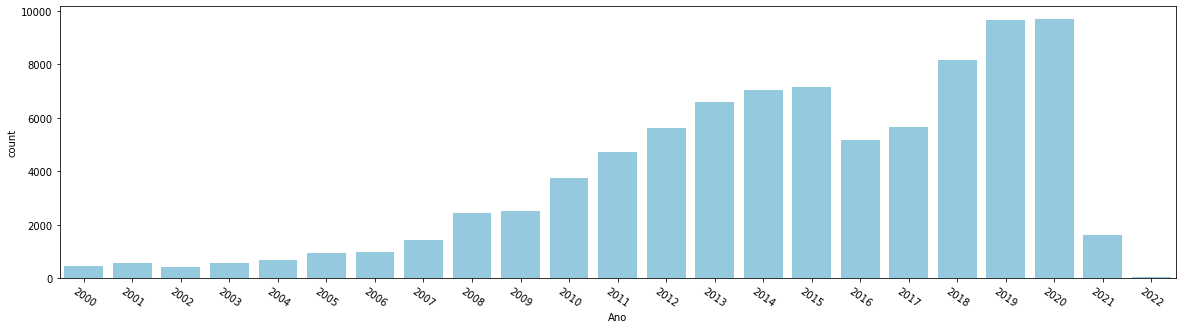

In [4]:
df = df[df['Ano'] != '1950 ou anterior']

df['Ano'] = df['Ano'].astype(float) # Alguns Anos estão em float como string, não é possível converter diretamente de float em uma string para int
df['Ano'] = df['Ano'].astype(int)

df = df[df['Ano'] >= 2000]

plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data=df, x='Ano', color='skyblue')

## Preço por ano

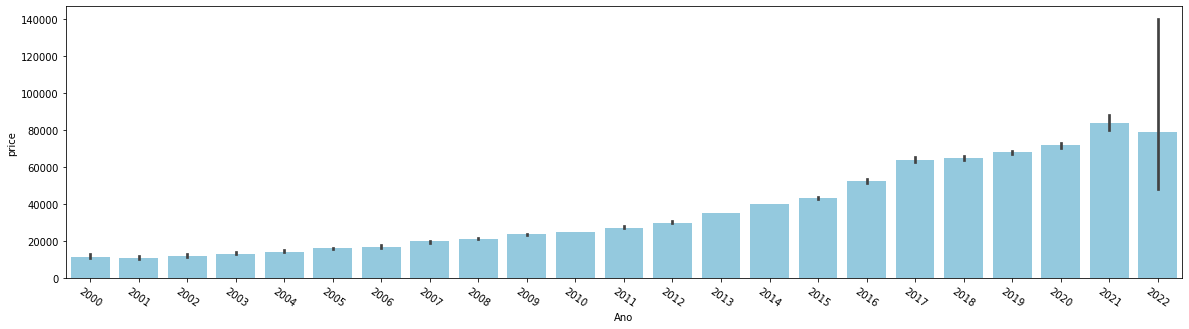

In [5]:
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.barplot(data= df,x="Ano", y="price",estimator=np.median, color='skyblue')
plt.show()

Text(0.5, 0, 'Ano')

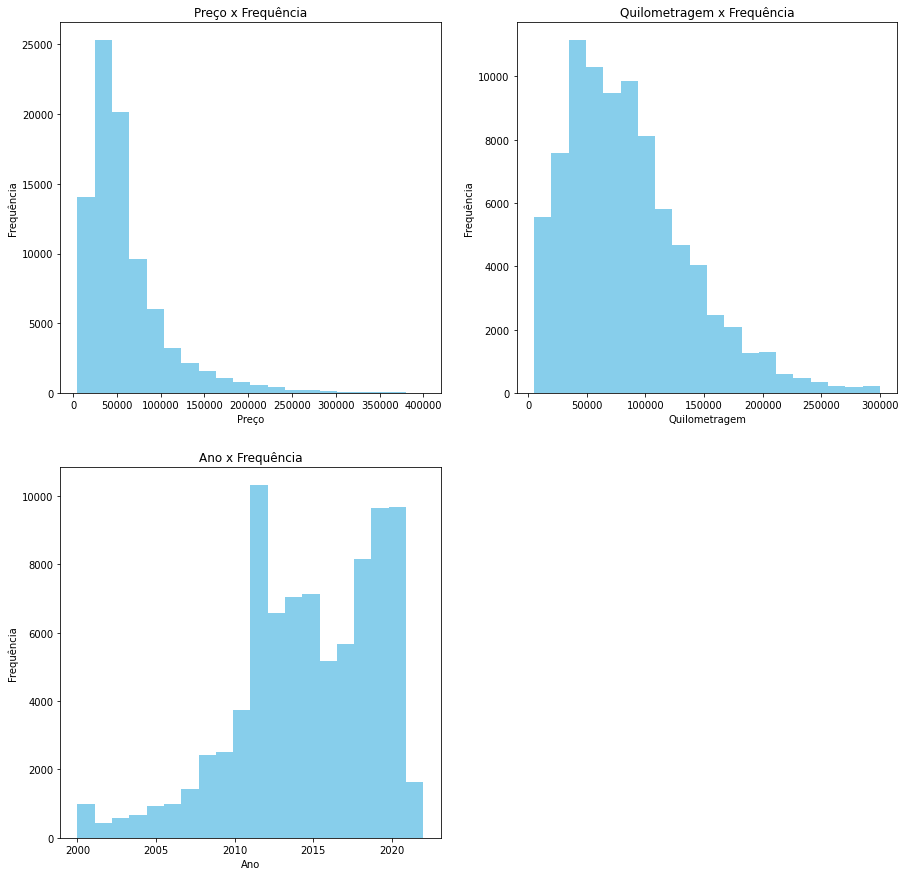

In [6]:
plt.figure(figsize=(15,15))

plt.subplot(221)
df['price'].plot.hist(bins=20, color='skyblue')
plt.title('Preço x Frequência')
plt.ylabel('Frequência')
plt.xlabel('Preço')

plt.subplot(222)
df['Quilometragem'].plot.hist(bins=20, color='skyblue')
plt.title('Quilometragem x Frequência')
plt.ylabel('Frequência')
plt.xlabel('Quilometragem')

plt.subplot(223)
df['Ano'].plot.hist(bins=20, color='skyblue')
plt.title('Ano x Frequência')
plt.ylabel('Frequência')
plt.xlabel('Ano')

Text(0, 0.5, 'Total')

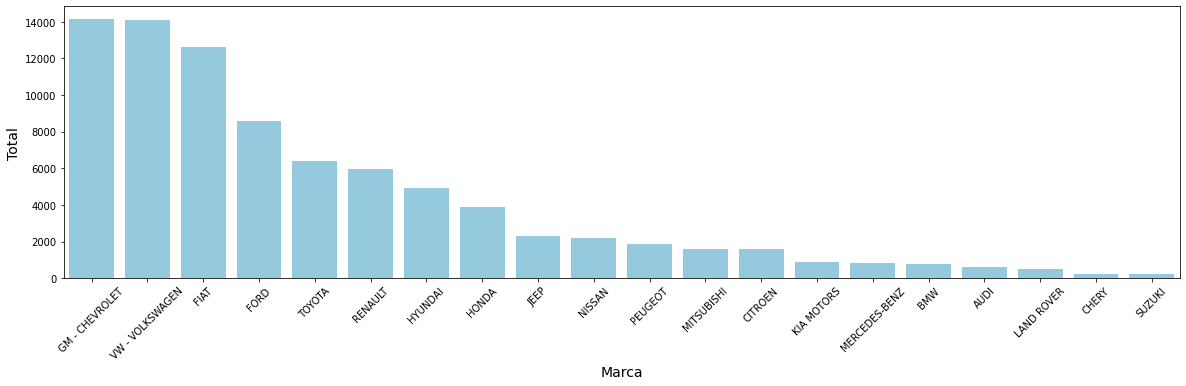

In [7]:
plt.figure(figsize=(20,5))
plt.xticks(rotation= 45)
sns.countplot(data=df, x='Marca', order=df['Marca'].value_counts().index[:20], color='skyblue')
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Total', fontsize=14)

Text(0, 0.5, 'Marca')

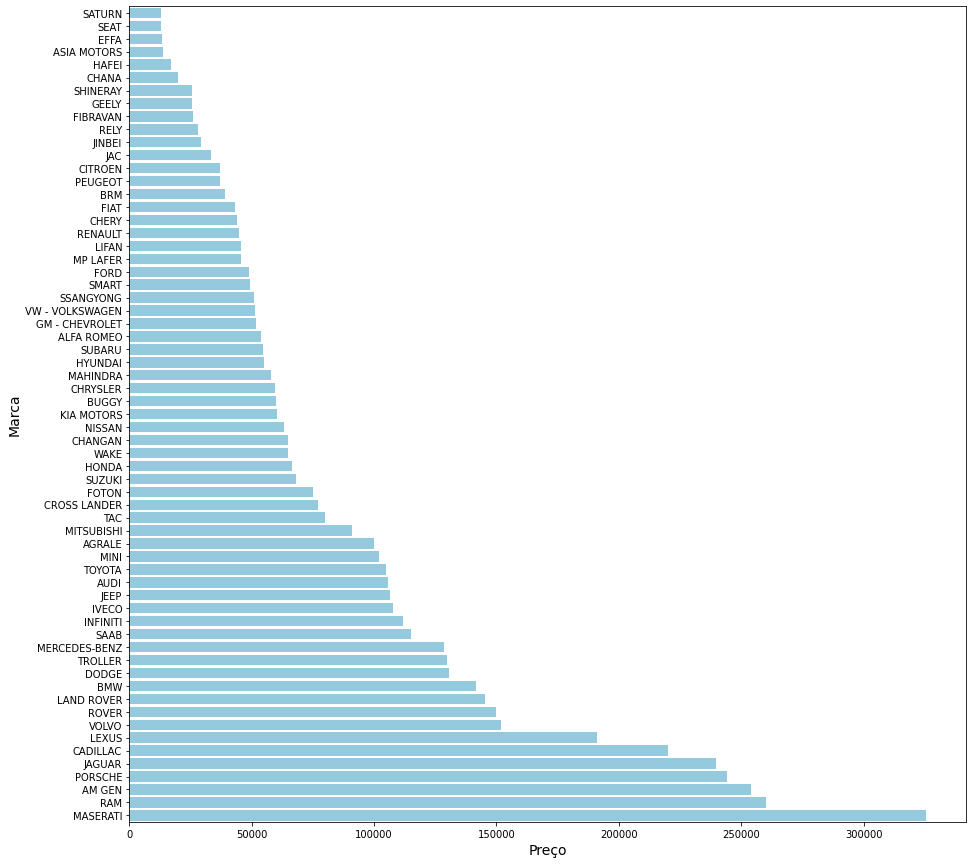

In [8]:
# PRICE MEAN FOR EACH MANUFACTURER WITH ALL TYPE COMBINED

price_mean = df[['price','Marca']].groupby('Marca').mean()
price_mean = price_mean.sort_values(['price'], ascending=True)

plt.figure(figsize=(15, 15))
pr = sns.barplot(data=price_mean, x="price", y=price_mean.index, color='skyblue')
plt.xlabel('Preço', fontsize=14)
plt.ylabel('Marca', fontsize=14)

Text(0, 0.5, 'Total')

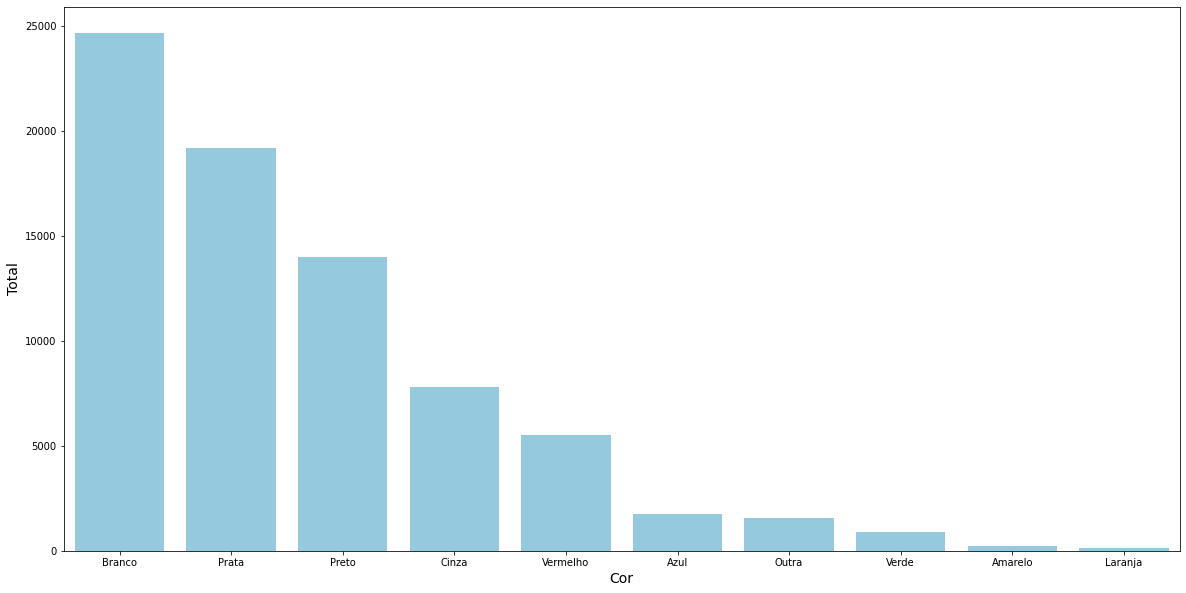

In [9]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=df, x='Cor', order=df['Cor'].value_counts().index, color='skyblue')
plt.xlabel('Cor', fontsize=14)
plt.ylabel('Total', fontsize=14)

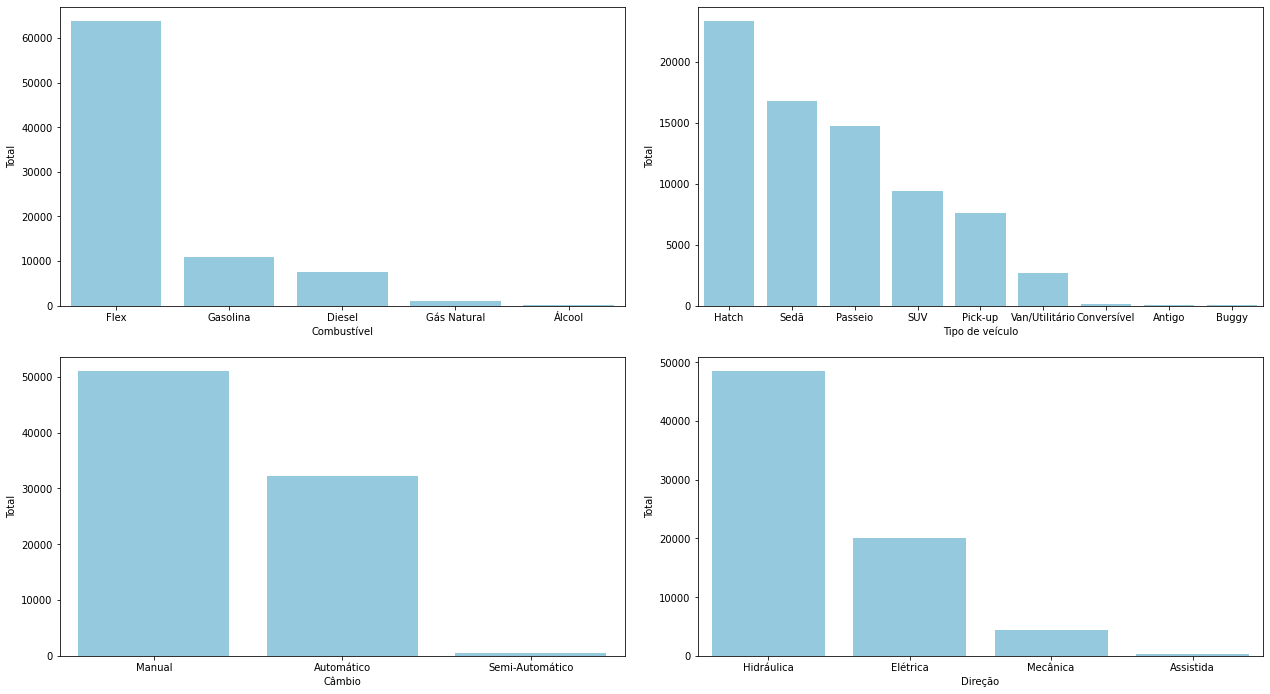

In [10]:
cat_type = ['Combustível', 'Tipo de veículo', 'Câmbio', 'Direção']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10)) 

for i, var in enumerate(cat_type):
    row = i//2
    pos = i % 2    
    plot = sns.countplot(x=var, data=df, order = df[var].value_counts().index, ax=axs[row][pos], color='skyblue')
    plot.set(xlabel=var, ylabel='Total')
    var = plot.set_xticklabels(plot.get_xticklabels())
fig.tight_layout(pad=2.0)

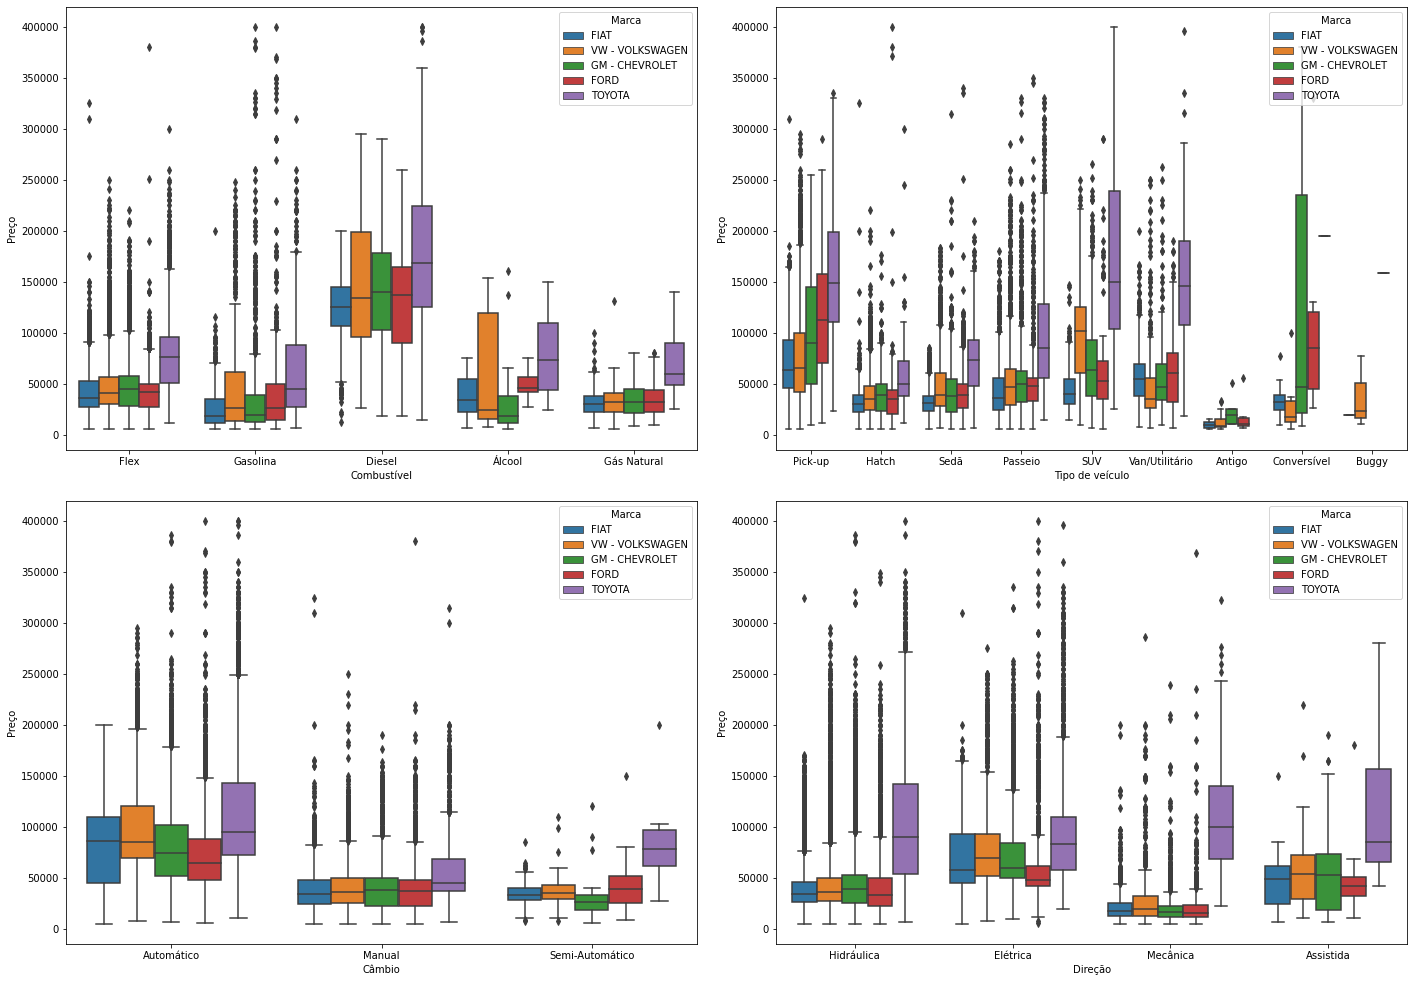

In [11]:
# Price distribution for each category
columns = ['Combustível', 'Tipo de veículo', 'Câmbio', 'Direção']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 14)) 

manufacturers = [
    'GM - CHEVROLET', 'VW - VOLKSWAGEN', 'FIAT', 'FORD', 'TOYOTA',
#     'RENAULT', 'HYUNDAI', 'HONDA', 'JEEP', 'NISSAN',
]

vehiclesFromTop5Manufacturers = df.loc[(df['Marca'].isin(manufacturers)),:].copy()

for i, var in enumerate(columns):
    row = i//2
    pos = i % 2   
    plot = sns.boxplot(x=var, y='price', data=vehiclesFromTop5Manufacturers, hue='Marca', ax=axs[row][pos])
    plot.set(xlabel=var, ylabel='Preço')
fig.tight_layout(pad=2.0)  

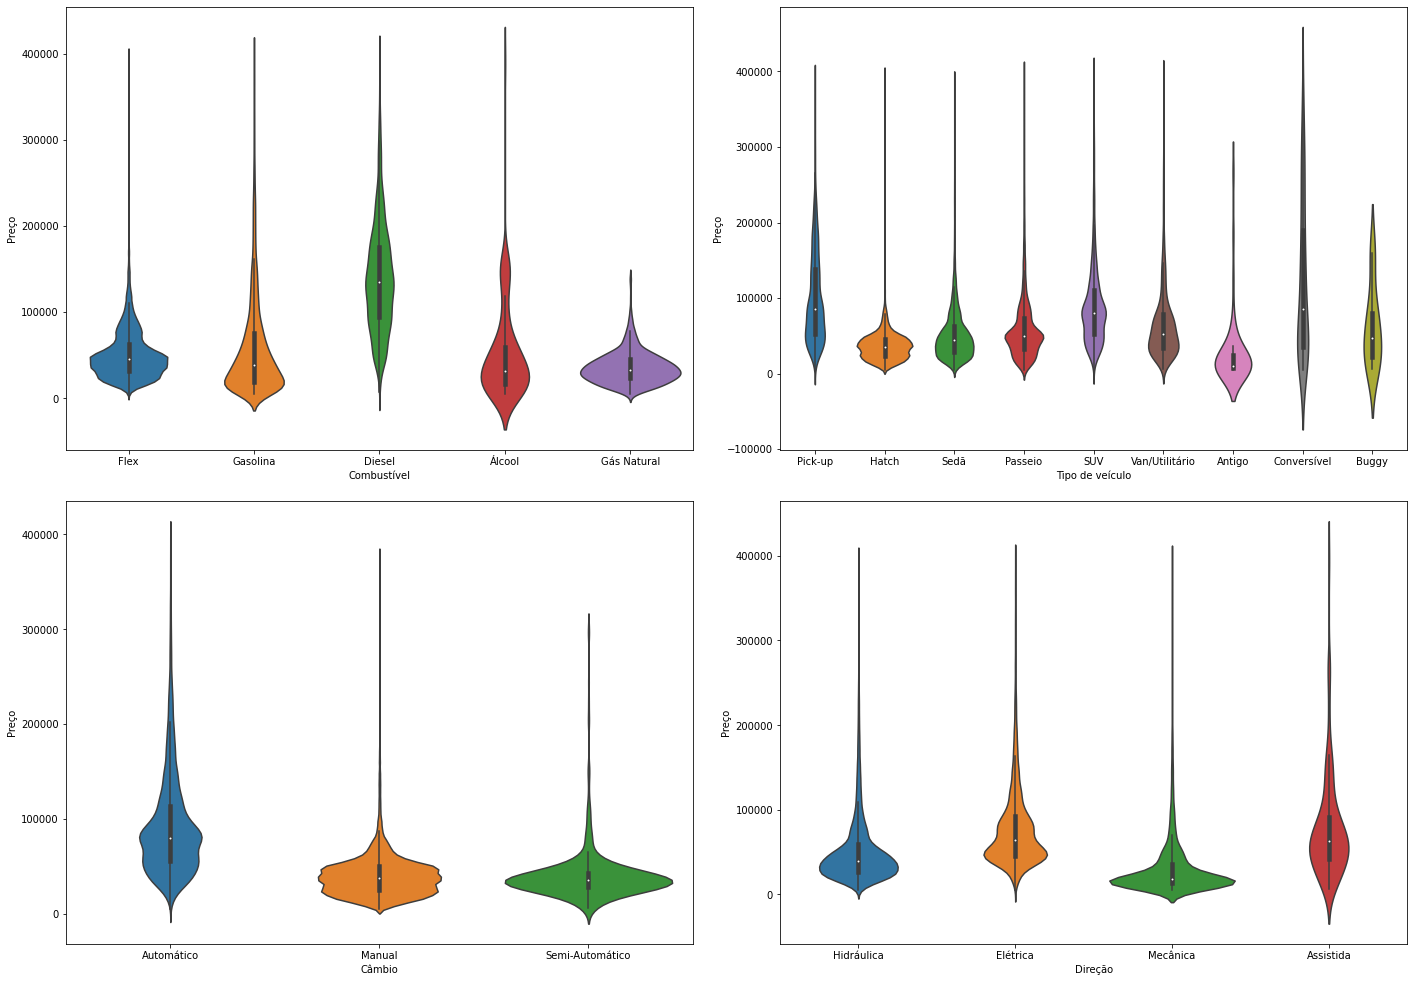

In [12]:
# PRICE DISTRIBUTION AND TENDENCY OF USED CARS

columns = ['Combustível', 'Tipo de veículo', 'Câmbio', 'Direção']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 14)) 

for i, var in enumerate(columns):
    row = i//2
    pos = i % 2   
    plot = sns.violinplot(x=var, y='price', data=df, ax=axs[row][pos]) # Can use vehiclesFromTop5Manufacturers
    plot.set(xlabel=var, ylabel='Preço')
fig.tight_layout(pad=2.0)    

### Scatterplot

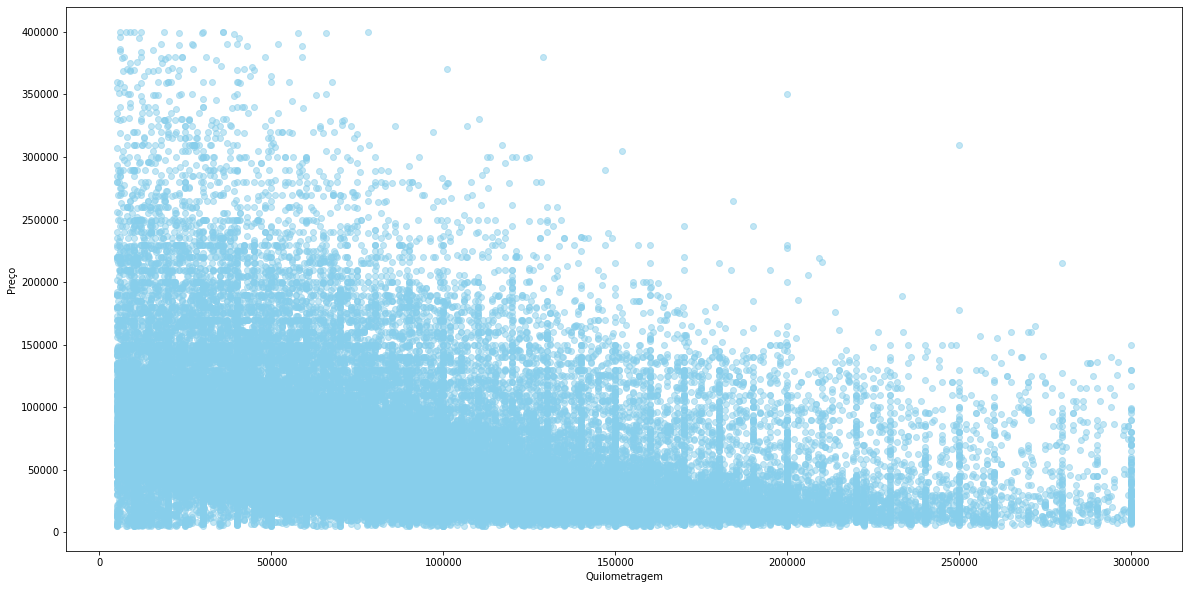

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(x=df['Quilometragem'], y=df['price'], color='skyblue', alpha=0.5)
plt.ylabel('Preço')
plt.xlabel('Quilometragem')
plt.show()

## Testes estatísticos de normalidade

In [14]:
from scipy.stats import shapiro, normaltest, chisquare, jarque_bera, kstest
from statsmodels.stats.diagnostic import lilliefors

columns = ['Ano', 'Quilometragem', 'price']
data = df[columns]
tests_names = ['Shapiro-Wilk', 'D\'Agostino\'s K-squared', 'Chi-Square', 'Lilliefors', 'Jarque-Bera', 'Kolmogorov-Smirnov']
tests = [shapiro, normaltest, chisquare, lilliefors, jarque_bera, kstest]


for test, test_name in zip(tests, tests_names):
    print(f'\n{test_name}')
    for i, column in enumerate(columns):
        
        if test_name == 'Kolmogorov-Smirnov':
            stat, p = test(data[column], 'norm')
        else:
            stat, p = test(data[column])
        
        if p > 0.05:
            print(f'{column} - p={p} Probably Gaussian')
        else:
            print(f'{column} - p={p} Probably not Gaussian')



Shapiro-Wilk
Ano - p=0.0 Probably not Gaussian
Quilometragem - p=0.0 Probably not Gaussian
price - p=0.0 Probably not Gaussian

D'Agostino's K-squared
Ano - p=0.0 Probably not Gaussian
Quilometragem - p=0.0 Probably not Gaussian
price - p=0.0 Probably not Gaussian

Chi-Square
Ano - p=1.0 Probably Gaussian
Quilometragem - p=0.0 Probably not Gaussian
price - p=0.0 Probably not Gaussian

Lilliefors
Ano - p=0.0009999999999998899 Probably not Gaussian
Quilometragem - p=0.0009999999999998899 Probably not Gaussian
price - p=0.0009999999999998899 Probably not Gaussian

Jarque-Bera
Ano - p=0.0 Probably not Gaussian
Quilometragem - p=0.0 Probably not Gaussian
price - p=0.0 Probably not Gaussian

Kolmogorov-Smirnov
Ano - p=0.0 Probably not Gaussian
Quilometragem - p=0.0 Probably not Gaussian
price - p=0.0 Probably not Gaussian


/home/fabio/.virtualenvs/data_science/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
df.to_csv('cars_dataset_mod2.csv', index=False)